<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Intro to Neural Networks


_Author:_ Tim Book

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
# Making some fake data for illustration purposes.
# On your own time, try making this BIGGER!
X, y = make_classification(
    n_samples=100_000,
    n_features=200,
    n_informative=200,
    n_redundant=0,
    n_classes=10,
    random_state=42
)

In [41]:
y

array([0, 8, 6, ..., 3, 9, 0])

In [42]:
# Since we're doing multiclass classification, we actually need to one-hot
# encode y to be an n-by-10 matrix. Keras doesn't know we're doing classification!
oh = OneHotEncoder(
    sparse=False,
    dtype=int,
    categories="auto"
)

y = oh.fit_transform(y.reshape(-1, 1))

In [43]:
y[:10]

# zero 
# 8 
# 6

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [44]:
y.shape

(100000, 10)

In [45]:
X.shape

(100000, 200)

In [46]:
y.shape

(100000, 10)

In [47]:
y[:10, :]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [48]:
# Instantiate model - from keras
model = Sequential()

In [49]:
# One by one, add Dense layers to our model.
# The hidden layers will use the ReLU activation
# Output layer will have softmax


# relu, tang, sigmoid 


model.add(Dense(128, activation="relu", input_shape=(200,)))  # First layer 
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax")) # multiclass classification - u need 10 nodes 

# apply softmax before doing the prediction 



In [50]:
# We need to compile our model in Keras.
# Need to tell it three things:
# Optimizer (for us, usually Adam)
# Loss (which?)
# Metrics (Definitely need accuracy, but could do more)

#opt = SGD(learning_rate=0.01)
#opt = Adam(learning_rate=0.001)

# Keras used to be separate project
# Google acquired Keras


# regresion - mse
# two class - binary entropy 
# many class - categorical crossemtropy 


model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["acc"]
)

In [51]:
# Fit!
# Need to specify batch_size and epochs
# Can validate with validation_split
hist = model.fit(
    X, y,
    batch_size=32,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
2500/2500 [==============================] - 4s 1ms/step - loss: 1.8406 - acc: 0.3850 - val_loss: 1.1101 - val_acc: 0.6281
Epoch 2/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7870 - acc: 0.7389 - val_loss: 0.6741 - val_acc: 0.7809
Epoch 3/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.4882 - acc: 0.8434 - val_loss: 0.5628 - val_acc: 0.8273
Epoch 4/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.3735 - acc: 0.8828 - val_loss: 0.5262 - val_acc: 0.8420
Epoch 5/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.3145 - acc: 0.9034 - val_loss: 0.4904 - val_acc: 0.8569
Epoch 6/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2762 - acc: 0.9149 - val_loss: 0.4921 - val_acc: 0.8652
Epoch 7/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2477 - acc: 0.9246 - val_loss: 0.4875 - val_acc: 0.8642
Epoch 8/10
2500/2500 [==============================] - 3s 1ms

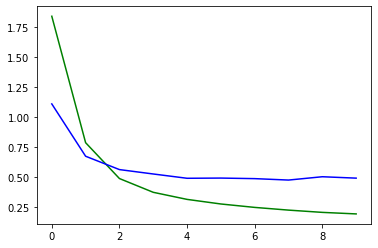

In [52]:
plt.plot(hist.epoch, hist.history['loss'], c='g');      # green - training loss
plt.plot(hist.epoch, hist.history['val_loss'], c='b');  # blue - test loss

this gives us hint prevent overfitting 


In [53]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16087772766730692989
xla_global_id: -1
]


In [54]:
import math

math.exp(2.22)

9.207330865882252

In [55]:
import numpy as np
list= np.array([2.22,4.12,0.1,28.9])
answer = []

for num in list:
    answer.append(math.exp(num))
answer = np.array(answer)

answer.sum()

3557218374935.8955